In [ ]:
#Bibliotecas

import numpy as np
import cv2 as cv
import math
import matplotlib.pyplot as plt

#ler a imagem
img = cv.imread('lake.tif',0)
img = cv2.imread('lake.tif', cv2.IMREAD_GRAYSCALE)
#Mostra a imagem lida em uma janela
cv.imshow('image',img) 
#espera a janela aberta
cv.waitKey(0) 
cv.destroyAllWindows() 
#largura e altura da imagem
altura, largura = img.shape[:2]  
print(altura,",",largura)
print(img.dtype)            
print(img.max())           
print(img.min())
print(len(img))

512 , 512
uint8
240
1
512


In [7]:
#Aplicando um filtro de suavização de média h_3x3

# Definir o kernel de médias 3x3
kernel = np.ones((3, 3), np.float32) / 9

# Aplicar o filtro passa-baixas usando cv2.filter2D
filtered_image = cv.filter2D(img, -1, kernel)

# Salvar e exibir a imagem filtrada
cv.imwrite("imagem_filtrada_3x3_opencv.png", filtered_image)
cv.imshow("Imagem Filtrada", filtered_image)
cv.waitKey(0)
cv.destroyAllWindows()

In [8]:
#Aplicando um filtro de suavização de média h_5x5 e h_7x7

# Definir os kernels 5x5 e 7x7
kernel_5x5 = np.ones((5, 5), np.float32) / 25  # Kernel 5x5 normalizado
kernel_7x7 = np.ones((7, 7), np.float32) / 49  # Kernel 7x7 normalizado

# Aplicar os filtros passa-baixas
filtered_image_5x5 = cv.filter2D(img, -1, kernel_5x5)
filtered_image_7x7 = cv.filter2D(img, -1, kernel_7x7)

# Salvar as imagens filtradas
cv.imwrite("imagem_filtrada_5x5.png", filtered_image_5x5)
cv.imwrite("imagem_filtrada_7x7.png", filtered_image_7x7)

# Exibir as imagens filtradas
cv.imshow("Imagem Filtrada 5x5", filtered_image_5x5)
cv.imshow("Imagem Filtrada 7x7", filtered_image_7x7)
cv.waitKey(0)
cv.destroyAllWindows()

In [9]:
#aplicando agora um filtro passa altas para h_3x3, h_5x5 e h_7x7

# Criar o filtro passa-altas a partir do passa-baixas h_3x3

kernel = np.ones((3, 3), np.float32) / 9
identity = np.zeros((3, 3), np.float32)  # Matriz identidade
center = 3 // 2
identity[center, center] = 1
kernel_high_pass = identity - kernel
filtered_high_pass = cv.filter2D(img, -1, kernel_high_pass)
cv.imwrite("imagem_filtrada_high_3x3.png", filtered_high_pass)
cv.imshow("Imagem Filtrada Passa Alta 3x3", filtered_high_pass)
cv.waitKey(0)
cv.destroyAllWindows()


# Criar o filtro passa-altas a partir do passa-baixas h_5x5

kernel_5x5 = np.ones((5, 5), np.float32) / 25
identity_5 = np.zeros((5, 5), np.float32)  # Matriz identidade
center = 5 // 2
identity_5[center, center] = 1
kernel_high_pass_5 = identity_5 - kernel_5x5
filtered_high_pass_5 = cv.filter2D(img, -1, kernel_high_pass_5)
cv.imwrite("imagem_filtrada_high_5x5.png", filtered_high_pass_5)
cv.imshow("Imagem Filtrada Passa Alta 5x5", filtered_high_pass_5)
cv.waitKey(0)
cv.destroyAllWindows()

# Criar o filtro passa-altas a partir do passa-baixas h_7x7

kernel_7x7 = np.ones((7, 7), np.float32) / 49
identity_7 = np.zeros((7, 7), np.float32)  # Matriz identidade
center = 7 // 2
identity_7[center, center] = 1
kernel_high_pass_7 = identity_7 - kernel_7x7
filtered_high_pass_7 = cv.filter2D(img, -1, kernel_high_pass_7)
cv.imwrite("imagem_filtrada_high_7x7.png", filtered_high_pass_7)
cv.imshow("Imagem Filtrada Passa Alta 7x7", filtered_high_pass_7)
cv.waitKey(0)
cv.destroyAllWindows()



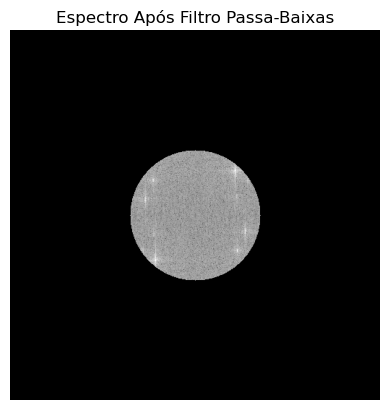

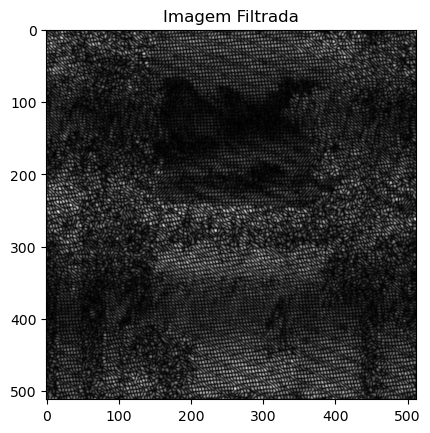

In [44]:
#Segunda parte do Trabalho
#Filtro Passa baixas DFT 

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem (certifique-se de estar em escala de cinza)
image = cv2.imread('lake.tif', cv2.IMREAD_GRAYSCALE)

# Aplicar a DFT (Transformada Discreta de Fourier)
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)

# Centralizar a DFT (mover a componente DC para o centro da imagem)
dft_shift = np.fft.fftshift(dft)

# Obter as dimensões da imagem
M, N = image.shape

# Criar o filtro passa-baixas
# ω_c = π/2, criamos um círculo com raio igual ao corte
omega_c = 180 / 2
u = np.fft.fftfreq(M, 1/M)  # Frequências horizontais
v = np.fft.fftfreq(N, 1/N)  # Frequências verticais
U, V = np.meshgrid(u, v)
H = np.sqrt(U**2 + V**2) <= omega_c  # Definir a máscara circular

H_expanded = np.expand_dims(H, axis=-1)
H_expanded = np.repeat(H_expanded, 2, axis=-1) 

# Aplicar o filtro passa-baixas na DFT centralizada
dft_shift_filtered = dft_shift * H_expanded


# Reverter o shift para a posição original
dft_ishift = np.fft.ifftshift(dft_shift_filtered)


# Calcular a magnitude do espectro filtrado (log para melhor visualização)
magnitude_spectrum_filtered = np.log(1 + cv2.magnitude(dft_ishift[:, :, 0], dft_ishift[:, :, 1]))


# Aplicar a Transformada Inversa de Fourier
image_filtered = cv2.idft(dft_ishift)
image_filtered = cv2.magnitude(image_filtered[:, :, 0], image_filtered[:, :, 1])

# Plots imagens

plt.imshow(magnitude_spectrum_filtered, cmap='gray')
plt.savefig('Imagem da DFT da imagem pos filtro pi_2.png', format='png')
plt.title('Espectro Após Filtro Passa-Baixas')
plt.axis('off')
plt.show()

plt.imshow(image_filtered, cmap='gray')
plt.savefig('Imagem Filtrada Passa Baixa pi_2.png', format='png')
plt.title('Imagem Filtrada')
plt.show()

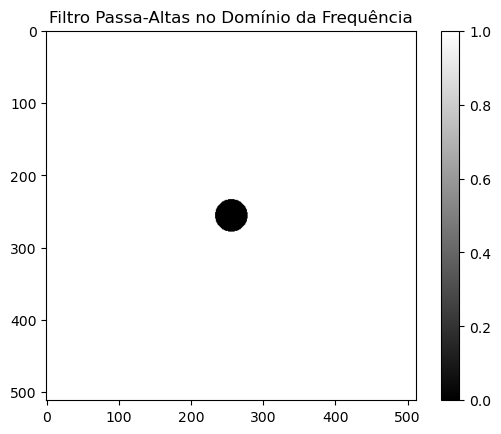

In [47]:
M, N = image.shape

# Criar a máscara do filtro passa-altas
omega_c =  180/2 # Raio do corte (ω_c = π/2)
u = np.fft.fftfreq(M, 1/M)  # Frequências horizontais
v = np.fft.fftfreq(N, 1/N)  # Frequências verticais
U, V = np.meshgrid(u, v)

# Filtro passa-baixas: 0 para frequências altas, 1 para frequências baixas
L_lowpass = np.sqrt(U**2 + V**2) <= omega_c

# Centralizar a máscara passa-baixas
L_lowpass_shifted = np.fft.fftshift(L_lowpass)

# Exibir a máscara de filtro passa-altas no domínio da frequência
plt.imshow(L_lowpass_shifted, cmap='gray')
plt.savefig('Filtro Passa Baixa pi_8.png', format='png')
plt.title('Filtro Passa-Baixa no Domínio da Frequência')
plt.colorbar()
plt.show()

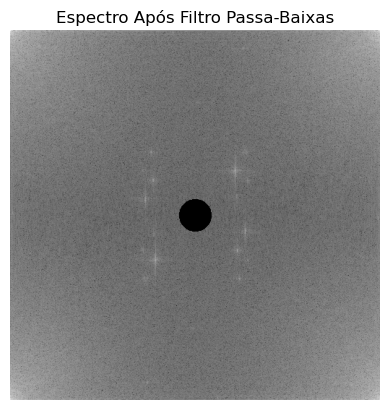

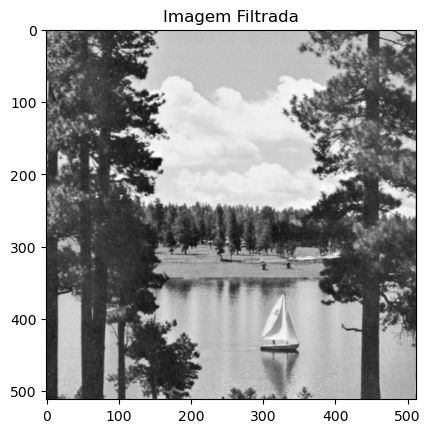

In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem (certifique-se de estar em escala de cinza)
image = cv2.imread('lake.tif', cv2.IMREAD_GRAYSCALE)

# Aplicar a DFT (Transformada Discreta de Fourier)
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)

# Centralizar a DFT (mover a componente DC para o centro da imagem)
dft_shift = np.fft.fftshift(dft)

# Obter as dimensões da imagem
M, N = image.shape

# Criar o filtro passa-altas
# ω_c = π/2, criamos um círculo com raio igual ao corte
omega_c = 180 / 8
u = np.fft.fftfreq(M, 1/M)  # Frequências horizontais
v = np.fft.fftfreq(N, 1/N)  # Frequências verticais
U, V = np.meshgrid(u, v)
H = np.sqrt(U**2 + V**2) > omega_c  # Definir a máscara circular

H_expanded = np.expand_dims(H, axis=-1)
H_expanded = np.repeat(H_expanded, 2, axis=-1) 

# Aplicar o filtro passa-baixas na DFT centralizada
dft_shift_filtered = dft_shift * H_expanded

# Reverter o shift para a posição original
dft_ishift = np.fft.ifftshift(dft_shift_filtered)

# Calcular a magnitude do espectro filtrado (log para melhor visualização)
magnitude_spectrum_filtered = np.log(1 + cv2.magnitude(dft_ishift[:, :, 0], dft_ishift[:, :, 1]))

# Aplicar a Transformada Inversa de Fourier
image_filtered = cv2.idft(dft_ishift)
image_filtered = cv2.magnitude(image_filtered[:, :, 0], image_filtered[:, :, 1])

# Exibir a imagens

plt.imshow(magnitude_spectrum_filtered, cmap='gray')
plt.savefig('Imagem da DFT da imagem pos filtro alta pi_8.png', format='png')
plt.title('Espectro Após Filtro Passa-Baixas')
plt.axis('off')
plt.show()

plt.imshow(image_filtered, cmap='gray')
plt.savefig('Imagem Filtrada Passa Alta pi_8.png', format='png')
plt.title('Imagem Filtrada')
plt.show()

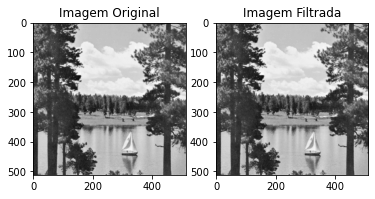

In [81]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem (certifique-se de estar em escala de cinza)
image = cv2.imread('lake.tif', cv2.IMREAD_GRAYSCALE)

# Aplicar a DFT (Transformada Discreta de Fourier)
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)

# Centralizar a DFT (mover a componente DC para o centro da imagem)
dft_shift = np.fft.fftshift(dft)

# Obter as dimensões da imagem
M, N = image.shape

# Criar o filtro passa-altas
# ω_c = π/2, criamos um círculo com raio igual ao corte
omega_c = 180 / 4
u = np.fft.fftfreq(M, 1/M)  # Frequências horizontais
v = np.fft.fftfreq(N, 1/N)  # Frequências verticais
U, V = np.meshgrid(u, v)
H = np.sqrt(U**2 + V**2) > omega_c  # Definir a máscara circular

H_expanded = np.expand_dims(H, axis=-1)
H_expanded = np.repeat(H_expanded, 2, axis=-1) 

# Aplicar o filtro passa-baixas na DFT centralizada
dft_shift_filtered = dft_shift * H_expanded

# Reverter o shift para a posição original
dft_ishift = np.fft.ifftshift(dft_shift_filtered)

# Aplicar a Transformada Inversa de Fourier
image_filtered = cv2.idft(dft_ishift)
image_filtered = cv2.magnitude(image_filtered[:, :, 0], image_filtered[:, :, 1])

# Exibir a imagem original e a filtrada
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagem Original')

plt.subplot(1, 2, 2)
plt.imshow(image_filtered, cmap='gray')
plt.title('Imagem Filtrada')


plt.show()

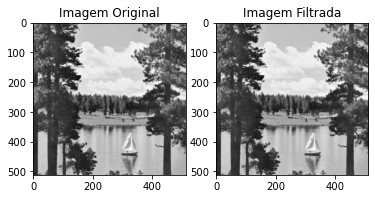

In [82]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem (certifique-se de estar em escala de cinza)
image = cv2.imread('lake.tif', cv2.IMREAD_GRAYSCALE)

# Aplicar a DFT (Transformada Discreta de Fourier)
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)

# Centralizar a DFT (mover a componente DC para o centro da imagem)
dft_shift = np.fft.fftshift(dft)

# Obter as dimensões da imagem
M, N = image.shape

# Criar o filtro passa-altas
# ω_c = π/8, criamos um círculo com raio igual ao corte
omega_c = 180 / 8
u = np.fft.fftfreq(M, 1/M)  # Frequências horizontais
v = np.fft.fftfreq(N, 1/N)  # Frequências verticais
U, V = np.meshgrid(u, v)
H = np.sqrt(U**2 + V**2) > omega_c  # Definir a máscara circular

H_expanded = np.expand_dims(H, axis=-1)
H_expanded = np.repeat(H_expanded, 2, axis=-1) 

# Aplicar o filtro passa-baixas na DFT centralizada
dft_shift_filtered = dft_shift * H_expanded

# Reverter o shift para a posição original
dft_ishift = np.fft.ifftshift(dft_shift_filtered)

# Aplicar a Transformada Inversa de Fourier
image_filtered = cv2.idft(dft_ishift)
image_filtered = cv2.magnitude(image_filtered[:, :, 0], image_filtered[:, :, 1])

# Exibir a imagem original e a filtrada
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagem Original')

plt.subplot(1, 2, 2)
plt.imshow(image_filtered, cmap='gray')
plt.title('Imagem Filtrada')


plt.show()

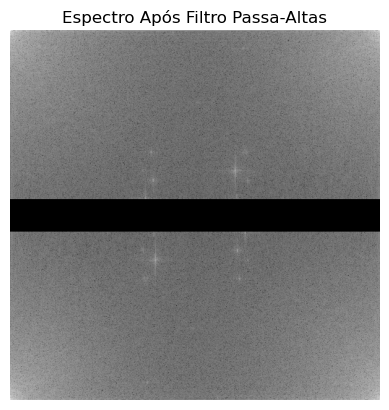

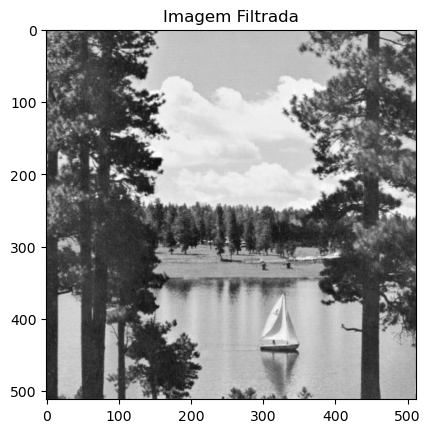

In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem em escala de cinza
image = cv2.imread('lake.tif', cv2.IMREAD_GRAYSCALE)

# Obter as dimensões da imagem
M, N = image.shape

# Aplicar a DFT
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)

# Centralizar a DFT (mover a componente DC para o centro da imagem)
dft_shift = np.fft.fftshift(dft)

# Criar a máscara passa-altas apenas na direção horizontal
omega_c = 180/ 8  # Frequência de corte
u = np.fft.fftfreq(M, 1/M)  # Frequências horizontais
v = np.fft.fftfreq(N, 1/N)  # Frequências verticais
U, V = np.meshgrid(u, v)

# Máscara passa-altas: 1 para |u| > ω_c e 0 para |u| <= ω_c
H_highpass_horizontal = np.abs(V) > omega_c

# Expandir a máscara para combinar com a DFT (com dois canais: real e imaginário)
H_highpass_horizontal_expanded = np.expand_dims(H_highpass_horizontal, axis=-1)
H_highpass_horizontal_expanded = np.repeat(H_highpass_horizontal_expanded, 2, axis=-1)

# Aplicar a máscara passa-altas no espectro da DFT
dft_shift_filtered = dft_shift * H_highpass_horizontal_expanded

# Reverter o shift para a posição original
dft_ishift = np.fft.ifftshift(dft_shift_filtered)

# Calcular a magnitude do espectro filtrado (log para melhor visualização)
magnitude_spectrum_filtered = np.log(1 + cv2.magnitude(dft_ishift[:, :, 0], dft_ishift[:, :, 1]))

# Aplicar a Transformada Inversa de Fourier
image_filtered = cv2.idft(dft_ishift)
image_filtered = cv2.magnitude(image_filtered[:, :, 0], image_filtered[:, :, 1])

# Exibir a imagens

plt.imshow(magnitude_spectrum_filtered, cmap='gray')
plt.savefig('Imagem da DFT da imagem pos filtro alta horizontal pi_8.png', format='png')
plt.title('Espectro Após Filtro Passa-Altas')
plt.axis('off')
plt.show()

plt.imshow(image_filtered, cmap='gray')
plt.savefig('Imagem Filtrada Passa alta horizontal pi_8.png', format='png')
plt.title('Imagem Filtrada')
plt.show()

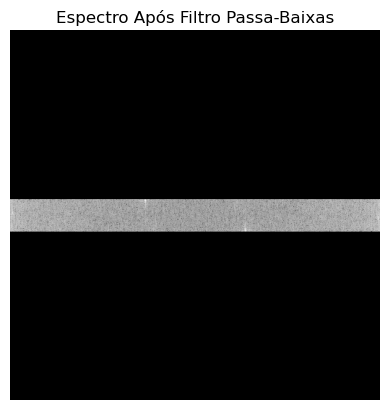

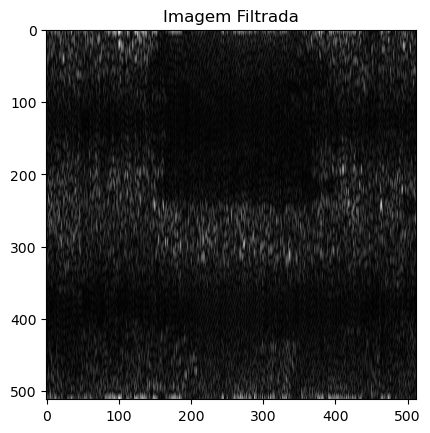

In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem em escala de cinza
image = cv2.imread('lake.tif', cv2.IMREAD_GRAYSCALE)

# Obter as dimensões da imagem
M, N = image.shape

# Aplicar a DFT
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)

# Centralizar a DFT (mover a componente DC para o centro da imagem)
dft_shift = np.fft.fftshift(dft)

# Criar a máscara passa-baixas apenas na direção horizontal
omega_c = 180 / 8  # Frequência de corte
u = np.fft.fftfreq(M, 1/M)  # Frequências horizontais
v = np.fft.fftfreq(N, 1/N)  # Frequências verticais
U, V = np.meshgrid(u, v)

# Máscara passa-baixas: 1 para |u| <= ω_c e 0 para |u| > ω_c
H_lowpass_horizontal = np.abs(V) <= omega_c

# Expandir a máscara para combinar com a DFT (com dois canais: real e imaginário)
H_lowpass_horizontal_expanded = np.expand_dims(H_lowpass_horizontal, axis=-1)
H_lowpass_horizontal_expanded = np.repeat(H_lowpass_horizontal_expanded, 2, axis=-1)

# Aplicar a máscara passa-baixas no espectro da DFT
dft_shift_filtered = dft_shift * H_lowpass_horizontal_expanded

# Reverter o shift para a posição original
dft_ishift = np.fft.ifftshift(dft_shift_filtered)

# Calcular a magnitude do espectro filtrado (log para melhor visualização)
magnitude_spectrum_filtered = np.log(1 + cv2.magnitude(dft_ishift[:, :, 0], dft_ishift[:, :, 1]))


# Aplicar a Transformada Inversa de Fourier
image_filtered = cv2.idft(dft_ishift)
image_filtered = cv2.magnitude(image_filtered[:, :, 0], image_filtered[:, :, 1])

# Exibir a imagens


plt.imshow(magnitude_spectrum_filtered, cmap='gray')
plt.savefig('Imagem da DFT da imagem pos filtro baixa horizontal pi_8.png', format='png')
plt.title('Espectro Após Filtro Passa-Baixas')
plt.axis('off')
plt.show()

plt.imshow(image_filtered, cmap='gray')
plt.savefig('Imagem Filtrada Passa baixa horizontal pi_8.png', format='png')
plt.title('Imagem Filtrada')
plt.show()

In [61]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import os

# Parâmetros do filtro
fs = 44100  # Frequência de amostragem
num_taps = 500  # Ordem do filtro
frequencias_centrais = [32, 64, 128, 256, 512, 1000, 2000, 4000, 8000, 16000]  # Frequências centrais

# Criar diretório para salvar as imagens
output_dir = "filtros_hamming"
os.makedirs(output_dir, exist_ok=True)

# Função para projetar os filtros FIR
def projetar_filtro(fs, num_taps, fc):
    f_low = max(fc / np.sqrt(2), 1)
    f_high = min(fc * np.sqrt(2), fs / 2 - 1)
    return signal.firwin(num_taps, [f_low, f_high], pass_zero=False, fs=fs, window='hamming')

# Criar e salvar os filtros
for i, fc in enumerate(frequencias_centrais):
    filtro = projetar_filtro(fs, num_taps, fc)

    # Plotar resposta em frequência
    w, h = signal.freqz(filtro, worN=8000, fs=fs)
    plt.figure(figsize=(8, 4))
    plt.plot(w, 20 * np.log10(abs(h)), color='b', linewidth=2)
    plt.title(f'Filtro FIR (Janela Hamming) - {fc} Hz')
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.grid()
    plt.xscale('log')
    plt.ylim(-80, 5)

    # Salvar imagem
    filename = os.path.join(output_dir, f"filtro_{fc}Hz.png")
    plt.savefig(filename, dpi=300)
    plt.close()

print(f"Filtros salvos em '{output_dir}' com sucesso!")

Filtros salvos em 'filtros_hamming' com sucesso!


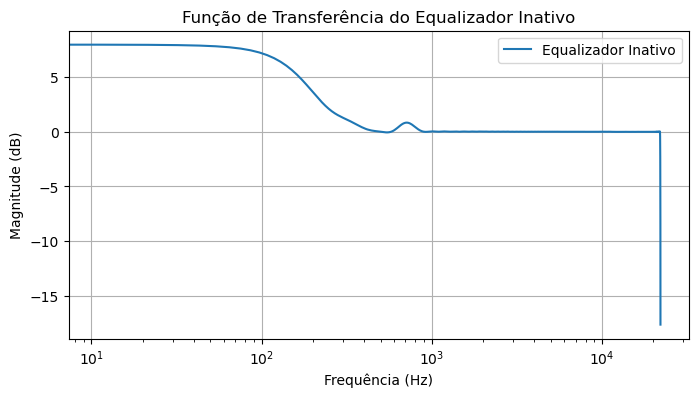

In [69]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Parâmetros do sinal
fs = 44100  # Frequência de amostragem
num_taps = 500  # Ordem do filtro FIR
frequencias_centrais = [32, 64, 128, 256, 512, 1000, 2000, 4000, 8000, 16000]

def projetar_filtros(fs, num_taps, frequencias_centrais):
    filtros = []
    for fc in frequencias_centrais:
        f_low = max(fc / np.sqrt(2), 1)
        f_high = min(fc * np.sqrt(2), fs / 2 - 1)
        if f_low < f_high:
            taps = signal.firwin(num_taps, [f_low, f_high], pass_zero=False, fs=fs, window='hamming')
            filtros.append(taps)
    return np.array(filtros)

# Criar os filtros FIR
filtros = projetar_filtros(fs, num_taps, frequencias_centrais)

# Ganhos em 0 dB (equivalente a fator linear 1)
ganhos_db = np.zeros(len(frequencias_centrais))
ganhos = 10**(ganhos_db / 20)

# Função de transferência do equalizador inativo (h[n])
h = np.sum(filtros.T * ganhos, axis=1)

# Calcular resposta em frequência
w, H = signal.freqz(h, worN=2048, fs=fs)

# Plotar a função de transferência
plt.figure(figsize=(8, 4))
plt.plot(w, 20 * np.log10(abs(H)), label='Equalizador Inativo')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title('Função de Transferência do Equalizador Inativo')
plt.grid()
plt.legend()
plt.xscale('log')

filename = 'Equalizador_inativo.png'
plt.savefig(filename, dpi=300)

plt.show()

 # Salvar imagem


